# 读取test.json

In [10]:
import json


with open('/home/syt/project/Accelerate_RAG/multi_gpu/dataset/nq_dpr/single/dev.json', 'r', encoding='utf-8') as file:
    nq_test_data = json.load(file)
print(type(nq_test_data),len(nq_test_data))
print(type(nq_test_data[0]),nq_test_data[0].keys())
print(type(nq_test_data[0]['question']),nq_test_data[0]['question'])
print(type(nq_test_data[0]['answers']),nq_test_data[0]['answers'])
print(type(nq_test_data[0]['ctxs']),len(nq_test_data[0]['ctxs']))
print(nq_test_data[0]['ctxs'][0])

<class 'list'> 8757
<class 'dict'> dict_keys(['question', 'answers', 'ctxs'])
<class 'str'> who sings does he love me with reba
<class 'list'> ['Linda Davis']
<class 'list'> 100
{'id': '7624371', 'title': 'Linda Davis', 'text': 'Linda Davis Linda Kaye Davis (born November 26, 1962) is an American country music singer. Before beginning a career as a solo artist, she had three minor country singles in the charts as one half of the duo Skip & Linda. In her solo career, Davis has recorded five studio albums for major record labels and more than 15 singles. Her highest chart entry is "Does He Love You", her 1993 duet with Reba McEntire, which reached number one on the "Billboard" country charts and won both singers the Grammy for Best Country Vocal Collaboration. Her highest solo chart position', 'score': '90.75005', 'has_answer': True}


In [31]:
import json


with open('/home/syt/project/compressor_500/new_code/experiment/llama32_1b_500to1/output/info.json', 'r', encoding='utf-8') as file:
    info = json.load(file)
print(info[0])
print(info[1])
print(info[100])
print(info[1000])
print(info[2000])

print(info[-2])
print(info[-1])

print(info[1].keys())


{'run_time(hours)': 0.00025120264954037137, 'total_steps': 13375, 'steps': 0.125, 'training_loss': {'ae_loss': 4.34375, 'lm_loss': 4.90625}, 'learning_rate': 3.3333333333333335e-07}
{'run_time(hours)': 0.0003253234757317437, 'total_steps': 13375, 'steps': 0.25, 'training_loss': {'ae_loss': 4.15625, 'lm_loss': 4.25}, 'learning_rate': 3.3333333333333335e-07}
{'run_time(hours)': 0.006656849582990011, 'total_steps': 13375, 'steps': 12.625, 'training_loss': {'ae_loss': 3.875, 'lm_loss': 3.5625}, 'learning_rate': 4.32e-06}
{'run_time(hours)': 0.06371104333135817, 'total_steps': 13375, 'steps': 125.125, 'training_loss': {'ae_loss': 3.21875, 'lm_loss': 3.515625}, 'learning_rate': 4.1861111111111134e-05}
{'run_time(hours)': 0.12872994621594747, 'total_steps': 13375, 'steps': 250.125, 'training_loss': {'ae_loss': 2.609375, 'lm_loss': 2.578125}, 'learning_rate': 8.338888888888903e-05}
{'run_time(hours)': 2.5751987653308444, 'total_steps': 13375, 'steps': 4999.875, 'training_loss': {'ae_loss': 2.4

{'run_time(hours)': 1.3653186753723356, 'total_steps': 13375, 'steps': 2099.625, 'training_loss': {'ae_loss': 1.5859375, 'lm_loss': 2.8125}, 'learning_rate': 0.0001}
{'run_time(hours)': 1.365370168354776, 'total_steps': 13375, 'steps': 2099.75, 'training_loss': {'ae_loss': 1.2734375, 'lm_loss': 2.6875}, 'learning_rate': 0.0001}
{'run_time(hours)': 1.3654215961032443, 'total_steps': 13375, 'steps': 2099.875, 'training_loss': {'ae_loss': 1.5859375, 'lm_loss': 3.40625}, 'learning_rate': 0.0001}
{'run_time(hours)': 1.365496920877033, 'total_steps': 13375, 'steps': 2100.0, 'training_loss': {'ae_loss': 1.484375, 'lm_loss': 3.296875}, 'learning_rate': 0.0001}


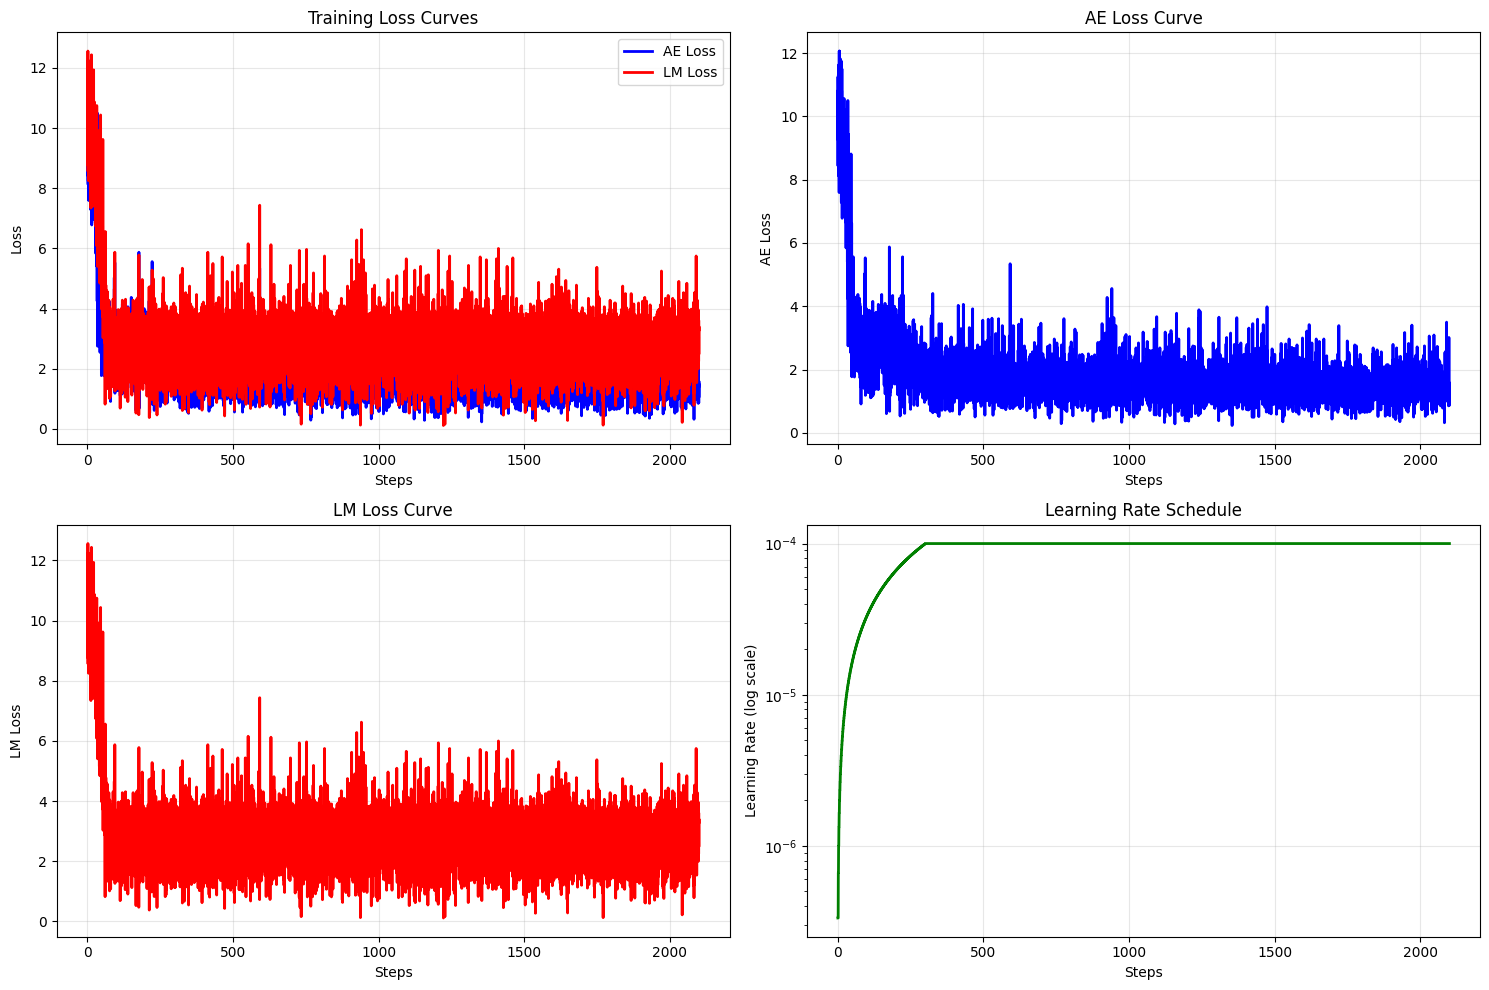

训练统计信息:
总步数: 2100.0
总数据点: 16800
AE Loss - 初始: 10.1875, 最终: 1.4844, 下降: 8.7031
LM Loss - 初始: 11.0000, 最终: 3.2969, 下降: 7.7031
学习率范围: 3.33e-07 - 1.00e-04


In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

# 读取JSON文件
# with open('/home/syt/project/compressor_500/new_code/experiment/llama32_1b_500to1_ae/output/info.json', 'r', encoding='utf-8') as file:
# with open('/home/syt/project/compressor_500/new_code/experiment/llama32_1b_500to1/output/info.json', 'r', encoding='utf-8') as file:
# with open('/home/syt/project/compressor_500/new_code/experiment/llama32_1b_500to100_pe/output/info.json', 'r', encoding='utf-8') as file:
with open('/home/syt/project/compressor_500/new_code/experiment/llama32_1b_512to16_pe/output/info.json', 'r', encoding='utf-8') as file:
    info = json.load(file)


print(info[-4])
print(info[-3])
print(info[-2])
print(info[-1])



# 提取数据
steps = []
ae_losses = []
lm_losses = []
learning_rates = []

for entry in info:
    steps.append(entry['steps'])
    ae_losses.append(entry['training_loss']['ae_loss'])
    lm_losses.append(entry['training_loss']['lm_loss'])
    learning_rates.append(entry['learning_rate'])

# 创建图表
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# 1. 双loss曲线图
ax1.plot(steps, ae_losses, 'b-', label='AE Loss', linewidth=2)
ax1.plot(steps, lm_losses, 'r-', label='LM Loss', linewidth=2)
ax1.set_xlabel('Steps')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss Curves')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. 单独的AE Loss曲线
ax2.plot(steps, ae_losses, 'b-', linewidth=2)
ax2.set_xlabel('Steps')
ax2.set_ylabel('AE Loss')
ax2.set_title('AE Loss Curve')
ax2.grid(True, alpha=0.3)

# 3. 单独的LM Loss曲线
ax3.plot(steps, lm_losses, 'r-', linewidth=2)
ax3.set_xlabel('Steps')
ax3.set_ylabel('LM Loss')
ax3.set_title('LM Loss Curve')
ax3.grid(True, alpha=0.3)

# 4. 学习率曲线
ax4.semilogy(steps, learning_rates, 'g-', linewidth=2)
ax4.set_xlabel('Steps')
ax4.set_ylabel('Learning Rate (log scale)')
ax4.set_title('Learning Rate Schedule')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 打印详细统计信息
print("=" * 50)
print("训练统计信息:")
print("=" * 50)
print(f"总步数: {steps[-1]}")
print(f"总数据点: {len(steps)}")
print(f"AE Loss - 初始: {ae_losses[0]:.4f}, 最终: {ae_losses[-1]:.4f}, 下降: {ae_losses[0]-ae_losses[-1]:.4f}")
print(f"LM Loss - 初始: {lm_losses[0]:.4f}, 最终: {lm_losses[-1]:.4f}, 下降: {lm_losses[0]-lm_losses[-1]:.4f}")
print(f"学习率范围: {min(learning_rates):.2e} - {max(learning_rates):.2e}")

In [ ]:
import json


with open('/home/syt/project/Accelerate_RAG/multi_gpu/dataset/nq_dpr/single/dev.json', 'r', encoding='utf-8') as file:
    nq_test_data = json.load(file)
# print(type(nq_test_data),len(nq_test_data))
# print(type(nq_test_data[0]),nq_test_data[0].keys())
# print(type(nq_test_data[0]['question']),nq_test_data[0]['question'])
# print(type(nq_test_data[0]['answers']),nq_test_data[0]['answers'])
# print(type(nq_test_data[0]['ctxs']),len(nq_test_data[0]['ctxs']))
# print(nq_test_data[0]['ctxs'][0])

# 读取jsonl文件

In [ ]:
#jsonl 文件读取

import json

# with open('/home/syt/project/Accelerate_RAG/multi_gpu/dataset/nq_dpr/qwen14b/ctx512_mem2/prepared_train_dev_data.jsonl', 'r', encoding='utf-8') as file:
with open('/home/syt/project/compressor_500/pretrain/output/long_text.json', 'r', encoding='utf-8') as file:
    data = [json.loads(line) for line in file if line.strip()]
print(len(data))
print(data[0])
print(data[1])
print(data[2])
print(data[3])



# 读取 mem 内信息

In [1]:
import torch

# 基本读取方式
data = torch.load(r'/home/syt/project/Accelerate_RAG/multi_gpu/dataset/nq_dpr/qwen14b/ctx512_mem2/test_mem.pt')
print(type(data),len(data))
print(type(data[0]),len(data[0]))
print(data[0].keys())
print(data[0]['mem'],data[0]['question'])

"""
输出:
<class 'dict'> 3610
<class 'dict'> 2
dict_keys(['mem', 'question'])
tensor([[ 0.0547,  0.0554, -0.0850,  ..., -0.0067,  0.0141, -0.0376],
        [ 0.0469, -0.0664, -0.0491,  ...,  0.0120, -0.0317, -0.0192]]) who got the first nobel prize in physics

"""

<class 'dict'> 3610
<class 'dict'> 2
dict_keys(['mem', 'question'])
tensor([[ 0.0547,  0.0554, -0.0850,  ..., -0.0067,  0.0141, -0.0376],
        [ 0.0469, -0.0664, -0.0491,  ...,  0.0120, -0.0317, -0.0192]]) who got the first nobel prize in physics


'\n输出:\n'

# 读取特殊token

In [3]:
from transformers import AutoTokenizer

def show_special_tokens(model_id: str):
    tk = AutoTokenizer.from_pretrained(model_id, trust_remote_code=True)

    print(f"\n=== {model_id} ===")
    # 1) 汇总映射（常见的 bos/eos/pad/unk 及其 id）
    print("special_tokens_map:", tk.special_tokens_map)

    print("-"*20)
    print("special_tokens_map_extended:", tk.special_tokens_map_extended)
    print("-"*20)
    # 2) 所有注册的特殊 token 及其 id

    print("all_special_tokens:", tk.all_special_tokens)

    print("-"*20)
    print("all_special_ids:", tk.all_special_ids)
    print("-"*20)
    # 3) 聊天模板（若存在），便于查看用到哪些标记
    if hasattr(tk, "chat_template") and tk.chat_template:
        print("\n--- chat_template ---")
        print(tk.chat_template)

print("--"*20)
show_special_tokens("/home/syt/project/model/qwen3/Qwen/Qwen3-14B")
print("--"*20)


----------------------------------------

=== /home/syt/project/model/qwen3/Qwen/Qwen3-14B ===
special_tokens_map: {'eos_token': '<|im_end|>', 'pad_token': '<|endoftext|>', 'additional_special_tokens': ['<|im_start|>', '<|im_end|>', '<|object_ref_start|>', '<|object_ref_end|>', '<|box_start|>', '<|box_end|>', '<|quad_start|>', '<|quad_end|>', '<|vision_start|>', '<|vision_end|>', '<|vision_pad|>', '<|image_pad|>', '<|video_pad|>']}
--------------------
special_tokens_map_extended: {'eos_token': AddedToken("<|im_end|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True), 'pad_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True), 'additional_special_tokens': ['<|im_start|>', '<|im_end|>', '<|object_ref_start|>', '<|object_ref_end|>', '<|box_start|>', '<|box_end|>', '<|quad_start|>', '<|quad_end|>', '<|vision_start|>', '<|vision_end|>', '<|vision_pad|>', '<|image_pad|>', '<|video_pad|>']}
-----------

In [4]:
show_special_tokens("/home/syt/project/Cram/model/model_scope_model/llama3_1_8b_instruct")


=== /home/syt/project/Cram/model/model_scope_model/llama3_1_8b_instruct ===
special_tokens_map: {'bos_token': '<|begin_of_text|>', 'eos_token': '<|eot_id|>'}
--------------------
special_tokens_map_extended: {'bos_token': AddedToken("<|begin_of_text|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True), 'eos_token': AddedToken("<|eot_id|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True)}
--------------------
all_special_tokens: ['<|begin_of_text|>', '<|eot_id|>']
--------------------
all_special_ids: [128000, 128009]
--------------------

--- chat_template ---
{{- bos_token }}
{%- if custom_tools is defined %}
    {%- set tools = custom_tools %}
{%- endif %}
{%- if not tools_in_user_message is defined %}
    {%- set tools_in_user_message = true %}
{%- endif %}
{%- if not date_string is defined %}
    {%- set date_string = "26 Jul 2024" %}
{%- endif %}
{%- if not tools is defined %}
    {%- set tools = none %}
{%- endif %}

{

In [5]:
show_special_tokens("/home/syt/project/Cram/model/model_scope_model/llama3_2_3b_instruct")


=== /home/syt/project/Cram/model/model_scope_model/llama3_2_3b_instruct ===
special_tokens_map: {'bos_token': '<|begin_of_text|>', 'eos_token': '<|eot_id|>'}
--------------------
special_tokens_map_extended: {'bos_token': AddedToken("<|begin_of_text|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True), 'eos_token': AddedToken("<|eot_id|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True)}
--------------------
all_special_tokens: ['<|begin_of_text|>', '<|eot_id|>']
--------------------
all_special_ids: [128000, 128009]
--------------------

--- chat_template ---
{{- bos_token }}
{%- if custom_tools is defined %}
    {%- set tools = custom_tools %}
{%- endif %}
{%- if not tools_in_user_message is defined %}
    {%- set tools_in_user_message = true %}
{%- endif %}
{%- if not date_string is defined %}
    {%- if strftime_now is defined %}
        {%- set date_string = strftime_now("%d %b %Y") %}
    {%- else %}
        {%- set da

# 读取pt

In [5]:
import torch

data=torch.load("/home/syt/project/compressor_500/new_code/cp/llama32_1b_500to1/output/mrqa-workshop___mrqa_eval_Llama-3.2-1B-Instruct_50000samples_instruction.pt")

In [1]:
import torch

data=torch.load("/home/syt/project/compressor_500/compressor_500branch/compressor500/train_Llama-3.2-1B-Instruct_1000000000token_len-510.pt")
type(data),len(data)

(list, 1083193)

In [3]:
type(data),len(data)


(list, 67854)

In [2]:
data[0].keys()

dict_keys(['inputs', 'lm_target'])

In [8]:
type(data[0]['inputs'])

torch.Tensor

In [13]:
len(data[451]['inputs'])

946

# 查看文件树

In [7]:
from pathlib import Path

def print_file_tree_pathlib(start_path, indent="", prefix=""):
    """
    使用pathlib模块打印目录树
    """
    path = Path(start_path)

    if path.is_file():
        print(f"{indent}{prefix} {path.name}")
        return

    print(f"{indent}{prefix} {path.name}/")

    try:
        items = sorted(path.iterdir(), key=lambda x: (x.is_file(), x.name.lower()))

        for i, item in enumerate(items):
            is_last = (i == len(items) - 1)
            new_prefix = "└──" if is_last else "├──"
            new_indent = indent + ("    " if is_last else "│   ")

            if item.is_dir():
                print_file_tree_pathlib(item, new_indent, new_prefix)
            else:
                print(f"{new_indent}{new_prefix} {item.name}")
    except PermissionError:
        print(f"{indent}    [权限拒绝]")

# 使用示例
if __name__ == "__main__":
    directory = "/home/syt/project/compressor_500/new_code/cp/llama32_1b_500to1"
    path = Path(directory)
    print_file_tree_pathlib(path)

 llama32_1b_500to1/
    └── output/
    │   ├── adapter.pt
    │   ├── config.json
    │   ├── info.json
    │   ├── mrqa-workshop___mrqa_eval_Llama-3.2-1B-Instruct_50000samples_instruction.pt
        └── mrqa-workshop___mrqa_train_Llama-3.2-1B-Instruct_50000samples_instruction.pt
